In [1]:
"""
Takes results path and plots some observable over time, specified at the bottom of the script.
"""
import os
os.environ["JAX_PLATFORMS"] = "cpu"

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json
import dotenv
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

root_path = '/net/vast-storage/scratch/vast/mcdermott/rphess/modula-v2/'
path = Path(root_path) / "experiment/results/"
sub_folders = ['final_results',]

results_concatenated = []
# iterate over all subfolders and open all json files in them
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for json_file in sub_folder_path.glob('*.json'):
        with open(json_file, 'r') as f:
            data = json.load(f)
            # add the data to the results list
            results = data['results']
            technique = data['parameters']['project']['default']
            lr = data['parameters']['lr']
            wmax = data['parameters']['w_max']
            train_loss = results['losses']
            val_loss = results['val_losses']
            train_acc = results['train_accuracies']
            val_acc = results['accuracies']
            spectral_norms_in = results['mlp_in']['spectral_norm']
            spectral_norms_0 = results['mlp_0']['spectral_norm']
            spectral_norms_out = results['mlp_out']['spectral_norm']
            row = {
                'technique': technique,
                'lr': lr,
                'w_max': wmax,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'train_acc': train_acc,
                'val_acc': val_acc,
                'spectral_norms_in': spectral_norms_in,
                'spectral_norms_0': spectral_norms_0,
                'spectral_norms_out': spectral_norms_out,
                'lipschitz': results['lipschitz_constant']
            }
            results_concatenated.append(row)
# create a dataframe from the results
results_df = pd.DataFrame(results_concatenated)

In [3]:
results_df

,technique,lr,w_max,train_loss,val_loss,train_acc,val_acc,spectral_norms_in,spectral_norms_0,spectral_norms_out,lipschitz
0,hard_cap,0.630957,5,"[2.3025851249694824, 2.002303789059321, 1.6548...","[2.2973729968070984, 1.59398455619812, 1.57009...","[0.123046875, 0.423828125, 0.5, 0.494140625, 0...","[0.09990234673023224, 0.42548829317092896, 0.4...","[0.0577240064740181, 1.2838916778564453, 1.398...","[0.958925724029541, 4.749751567840576, 4.84296...","[0.18940141797065735, 0.93702632188797, 0.9534...",92.180908
1,none,1.584893,1,"[2.3025851249694824, 2.0277731120586395, 1.873...","[2.291614592075348, 1.8234571993350983, 1.7876...","[0.123046875, 0.4453125, 0.44140625, 0.46875, ...","[0.09990234673023224, 0.34443360567092896, 0.3...","[0.15238775312900543, 1.9002296924591064, 2.34...","[0.9467647671699524, 6.468232154846191, 8.2679...","[0.18702474236488342, 1.1814810037612915, 1.14...",326.631500
2,orthogonal,1.000000,5,"[2.3025851249694824, 11.446001082658768, 1.926...","[52.027679443359375, 1.8073241114616394, 1.694...","[0.123046875, 0.25, 0.43359375, 0.4453125, 0.4...","[0.09990234673023224, 0.37128907442092896, 0.3...","[1.4427462816238403, 1.4428234100341797, 1.442...","[4.999350070953369, 4.998456954956055, 4.99783...","[0.9839959740638733, 0.984302282333374, 0.9843...",124.438614
3,soft_cap,0.398107,6,"[2.3025851249694824, 2.0336548537015915, 1.653...","[2.2987096905708313, 1.5997076213359833, 1.515...","[0.123046875, 0.427734375, 0.51953125, 0.50585...","[0.09990234673023224, 0.42656251788139343, 0.4...","[0.03828056529164314, 0.8309147357940674, 1.25...","[0.9990556240081787, 3.5839574337005615, 5.047...","[0.1975521594285965, 0.6682654619216919, 0.842...",115.335861
4,spec_hammer,0.398107,4,"[2.3025851249694824, 2.08522363503774, 1.67663...","[2.4839454293251038, 1.5875168859958648, 1.539...","[0.123046875, 0.380859375, 0.46875, 0.48632812...","[0.09990234673023224, 0.4366210997104645, 0.44...","[1.154700517654419, 1.1547006368637085, 1.3601...","[3.99985671043396, 4.000114917755127, 4.782732...","[0.7905690670013428, 0.7905722260475159, 0.827...",76.140419
5,spec_normalize,1.000000,6,"[2.3025851249694824, 1.953774521748225, 1.7339...","[2.294025206565857, 1.7008521556854248, 1.7234...","[0.123046875, 0.494140625, 0.515625, 0.4746093...","[0.09990234673023224, 0.3936523497104645, 0.37...","[0.09615015238523483, 1.8034499883651733, 1.75...","[0.999573826789856, 6.0058722496032715, 6.2212...","[0.19745610654354095, 1.1858545541763306, 1.18...",216.567993
6,spec_wd,0.157142,1,"[2.3025851249694824, 2.211859107017517, 1.9286...","[2.3010067701339723, 1.8045380413532257, 1.517...","[0.123046875, 0.2734375, 0.37109375, 0.4199218...","[0.09990234673023224, 0.37841796875, 0.4715820...","[0.015108725987374783, 0.32709959149360657, 0....","[0.9995592832565308, 1.8764054775238037, 2.610...","[0.1974533051252365, 0.3434215188026428, 0.476...",56.927094


In [4]:
# Set overall style
sns.set(style="white", context="talk")
sns.set_style('ticks')

In [5]:
tech_colors = {
    "Spectral soft cap":           "#8c564b",  # brown
    "Spectral hard cap":           "#9467bd",  # purple
    "Stiefel manifold":   "#d62728",  # red
    "Spectral hammer":    "#ff7f0e",  # orange
    "Spectral normalize":       "#2ca02c",  # green
    "Spectral weight decay":       "#1f77b4",  # muted blue
    "Weight decay":           "#7f7f7f",  # gray
}

# map technique names to official names
tech_map = {
    "none":           "Weight decay",
    "spec_wd":       "Spectral weight decay",
    "spec_normalize":       "Spectral normalize",
    "orthogonal":   "Stiefel manifold",
    "spec_hammer":    "Spectral hammer",
    "soft_cap":           "Spectral soft cap",
    "hard_cap":           "Spectral hard cap",
}

In [6]:
# best soft cap validation accuracy
best_soft_cap = max(results_df.loc[results_df['technique'] == 'soft_cap', 'val_acc'].item())
best_hard_cap = max(results_df.loc[results_df['technique'] == 'hard_cap', 'val_acc'].item())

print(f"Best soft cap validation accuracy: {best_soft_cap}")
print(f"Best hard cap validation accuracy: {best_hard_cap}")

Best soft cap validation accuracy: 0.5889648795127869
Best hard cap validation accuracy: 0.588085949420929


In [7]:
# make the x axis for y, knmowing that the number of logs was taken evenly spaced across 4900 steps
train_x_axis = np.linspace(0, 4900, num=len(results_df['train_loss'][0]), dtype=int)
val_x_axis = np.linspace(0, 4900, num=len(results_df['val_loss'][0]), dtype=int)

In [8]:
# Technique legend: colored lines, solid style
tech_handles = [
    Line2D([0], [0], color=color, lw=2) for tech, color in tech_colors.items()
]
tech_labels = [tech_map.get(t, t) for t in tech_colors]

# Metric legend: black lines with different styles
metric_handles = [
    Line2D([0], [0], color='black', linestyle='--', lw=2),
    Line2D([0], [0], color='black', linestyle='-', lw=2)
]
metric_labels = ['Train Accuracy', 'Validation Accuracy']


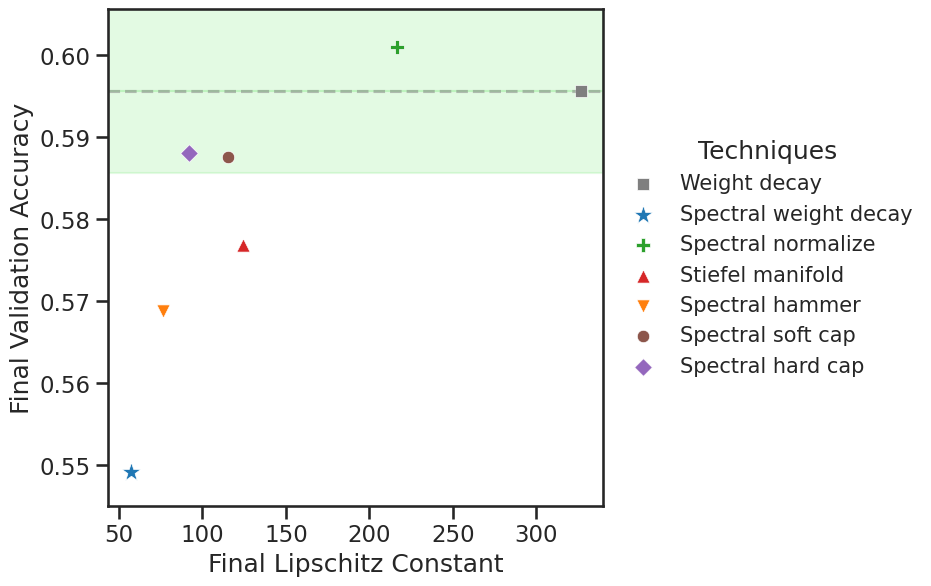

In [9]:
fig, ax = plt.subplots(figsize=(6.5, 6))  # Square aspect

# Get baseline accuracy (assumes 'none' marks baseline)
baseline_df = results_df[results_df['technique'] == 'none']
if len(baseline_df) == 0:
    raise ValueError("No baseline technique 'none' found in the data.")

baseline_acc = baseline_df['val_acc'].item()[-1]

# Create shaded regions for better visual reference
lower_threshold = baseline_acc - 0.01  # 1% below baseline
upper_threshold = baseline_acc + 0.01  # 1% above baseline

# Draw shaded bands around baseline
ax.axhspan(baseline_acc, upper_threshold, color='lightgreen', alpha=0.25)
ax.axhspan(lower_threshold, baseline_acc, color='lightgreen', alpha=0.25)

# Also add a line for the exact baseline
ax.axhline(y=baseline_acc, color='#7f7f7f', linestyle='--', alpha=0.5)

# Define markers for different techniques
markers = {
    'none': ['s', 80],          # square
    'soft_cap': ['o', 80],      # soft cap
    'hard_cap': ['D', 80],      # diamond
    'orthogonal': ['^', 90],    # triangle up
    'spec_hammer': ['v', 90],   # triangle down  
    'spec_normalize': ['P', 90], # plus
    'spec_wd': ['*', 200],       # star
}

# Now plot techniques
for technique in tech_map.keys():
    subset_df = results_df[results_df['technique'] == technique]
    if len(subset_df) == 0:
        continue

    subset = subset_df.iloc[0]
    
    lipschitz = subset['lipschitz']
    val_acc = subset['val_acc'][-1]
    color = tech_colors.get(tech_map.get(technique, "Unknown"), 'black')
    marker, size = markers.get(technique, ['o', 80])

    ax.scatter(lipschitz, val_acc, color=color, s=size, marker=marker, 
               label=tech_map[technique], edgecolors='white', linewidth=0.5)

plt.ylim(0.545, upper_threshold)

# Tight layout with room for suptitle and side legend
plt.tight_layout(rect=(0, 0, 0.95, 0.985))  # Room for title + legend

# Side legend
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          title='Techniques', fontsize='small', title_fontsize='medium',
          frameon=False)
plt.xlabel('Final Lipschitz Constant')
plt.ylabel('Final Validation Accuracy')

# plt.savefig("mlp_validation_vs_lipschitz.pdf", format='pdf', bbox_inches='tight')

plt.show()


In [10]:
target_spec_norms = [
    (256 / 3072) ** 0.5,
    (256 / 256) ** 0.5,
    (10 / 256) ** 0.5,
]

depend_on_w_max = [
    'soft_cap',
    'hard_cap',
    'orthogonal',
    'spec_hammer',
    'spec_normalize',
]

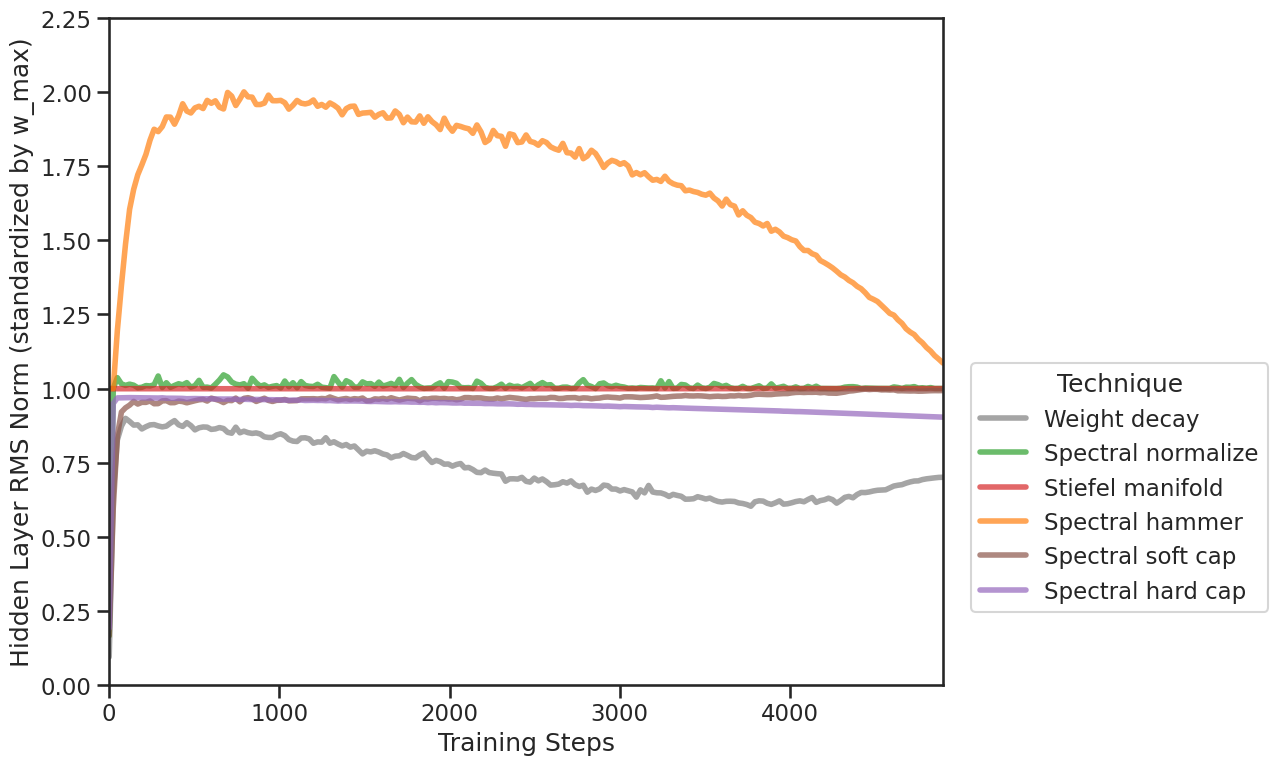

In [11]:
# Create a single figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create dictionary to store handles by technique
tech_handles = {}

# Loop through each technique
for i, technique in enumerate(tech_map.keys()):
    if technique in ['spec_wd']:
        continue
        
    # Filter the dataframe for the technique
    subset_df = results_df[results_df['technique'] == technique]
    
    if len(subset_df) == 0:
        continue
        
    subset = subset_df.iloc[0]
    
    # Get spectral norm values for hidden layer only
    spectral_norms_0 = subset['spectral_norms_0']
    
    # Convert spectral norms to approximate RMS norms
    n_hidden = 256  # Typical hidden size
    
    rms_norms_0 = [s * np.sqrt(n_hidden / n_hidden) for s in spectral_norms_0]
    if technique != 'none':
        rms_norms_0_stdrd = [s / subset['w_max'] for s in rms_norms_0]
    else:
        rms_norms_0_stdrd = [s * 0.1 for s in rms_norms_0]
    
    # Get the color for this technique
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    tech_name = tech_map.get(technique, technique)
    
    # Plot RMS norms with colors for techniques, only for hidden layer
    hidden_line = ax.plot(train_x_axis[:len(rms_norms_0)], rms_norms_0_stdrd, 
            color=color,
            linewidth=4,
            alpha=0.7,
            label=tech_name)[0]
    
    # Store one handle per technique (for color legend)
    if tech_name not in tech_handles:
        tech_handles[tech_name] = hidden_line

# Set y-axis limits
ax.set_ylim(0, 2.25)
ax.set_xlim(-0.1, max(train_x_axis))

# Add labels and title
ax.set_ylabel('Hidden Layer RMS Norm (standardized by w_max)')
ax.set_xlabel('Training Steps')
# ax.set_title('Hidden Layer RMS Norms During Training', fontsize=14)


# Create legend
technique_handles = list(tech_handles.values())
technique_labels = list(tech_handles.keys())

legend = ax.legend(
    technique_handles,
    technique_labels,
    loc='upper left',
    bbox_to_anchor=(1.02, 0.5),
    title='Technique',
    frameon=True
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Add room on right side

# plt.savefig("RMS_dynamics_methods.pdf", format='pdf', bbox_inches='tight')
 
plt.show()


## Making Pareto-Frontier figure
___

In [18]:
root_path = '/net/vast-storage/scratch/vast/mcdermott/rphess/modula-v2/'
path = Path(root_path) / "experiment/results/"
sub_folders = ['hardcap_results', 'orthog_results', 'softcap_results', 'spec_normalize_results', 'spec_wd_results', 'specham_results', 'normal_wd_results', ] #'adam_results']

results_concatenated = []
# iterate over all subfolders and open all json files in them
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for json_file in sub_folder_path.glob('*.json'):
        if 'adam' in str(json_file):
            optim = 'adam'
        else:
            optim = 'muon'
        with open(json_file, 'r') as f:
            data = json.load(f)
            # add the data to the results list
            results = data['results']
            technique = data['parameters']['project']['default']
            lr = data['parameters']['lr']
            wmax = data['parameters']['w_max']
            final_train_loss = results['losses'][-1]
            final_val_loss = results['val_losses'][-1]
            final_train_acc = results['train_accuracies'][-1]
            final_val_acc = results['accuracies'][-1]
            spec_wd = data['parameters']['spectral_wd']
            wd = data['parameters']['wd']
            lipschitz = results['lipschitz_constant']
            row = {
                'technique': technique,
                'lr': lr,
                'w_max': wmax,
                'final_train_loss': final_train_loss,
                'final_val_loss': final_val_loss,
                'final_train_acc': final_train_acc,
                'final_val_acc': final_val_acc,
                'spectral_wd': spec_wd,
                'wd': wd,
                'lipschitz': lipschitz,
                'optim': optim
            }
            results_concatenated.append(row)
# create a dataframe from the results
sweep_df = pd.DataFrame(results_concatenated)

In [19]:
sweep_df

,technique,lr,w_max,final_train_loss,final_val_loss,final_train_acc,final_val_acc,spectral_wd,wd,lipschitz,optim
0,hard_cap,0.010000,8,2.302585,2.302585,0.089844,0.103809,0.0,0.000000,2.972022e-11,muon
1,hard_cap,0.010000,4,2.302585,2.302585,0.089844,0.103613,0.0,0.000000,2.968919e-11,muon
2,hard_cap,0.010000,7,2.302585,2.302585,0.091797,0.104199,0.0,0.000000,2.969915e-11,muon
3,hard_cap,0.010000,9,2.302585,2.302585,0.091797,0.104785,0.0,0.000000,2.971121e-11,muon
4,hard_cap,0.010000,6,2.302585,2.302585,0.091797,0.103906,0.0,0.000000,2.971038e-11,muon
...,...,...,...,...,...,...,...,...,...,...,...
923,none,6.309573,0,0.598449,1.262724,0.812500,0.561230,0.0,0.046416,7.913652e+02,muon
924,none,6.309573,0,0.856144,1.190190,0.736328,0.577832,0.0,0.100000,2.873388e+02,muon
925,none,6.309573,0,1.235084,1.335322,0.593750,0.549219,0.0,0.215443,6.876181e+01,muon
926,none,6.309573,0,1.744547,1.755071,0.431641,0.441602,0.0,0.464159,9.507421e+00,muon


In [20]:
# get rid of rows where the lipschitz constant is less than 10**-2 and rows where the final validation loss is greater than 7
sweep_df = sweep_df[sweep_df['lipschitz'] > 10**-1]
sweep_df = sweep_df[sweep_df['lipschitz'] < 10**4]
sweep_df = sweep_df[sweep_df['final_val_loss'] < 2.28]

# Bin Lipschitz values logarithmically
log_lipschitz = np.log10(sweep_df['lipschitz'])
sweep_df['log_lipschitz'] = log_lipschitz

# Define fine-grained log bins (e.g. 40 bins between log10(0.1) and log10(1e5))
num_bins = 50
bins = np.linspace(log_lipschitz.min(), log_lipschitz.max(), num_bins)
sweep_df['log_bin'] = pd.cut(log_lipschitz, bins)


# Group by bins and pick 1-2 lowest loss points per bin
highlight_points = (
    sweep_df
    .dropna(subset=['lipschitz', 'final_val_loss'])  # Remove invalid
    .sort_values('final_val_loss')
    .groupby('log_bin', group_keys=False)
    .head(1)  # change to 1 or 3 depending on how sparse you want
)

/tmp/ipykernel_654886/710956927.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('log_bin', group_keys=False)


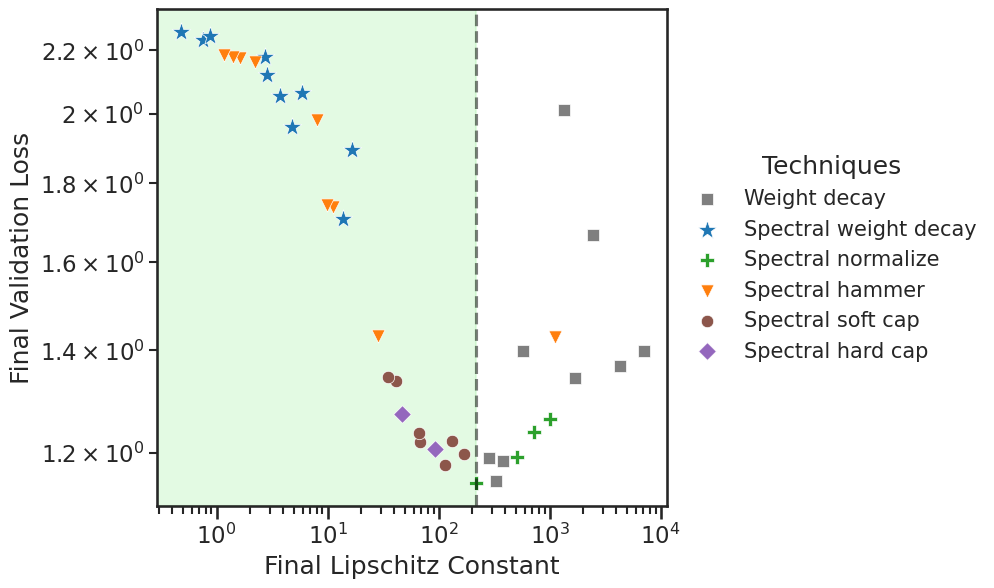

In [21]:
fig, ax = plt.subplots(figsize=(6.5, 6))  # Square aspect

# Define markers for different techniques
markers = {
    'none': ['s', 80],          # square
    'soft_cap': ['o', 80],      # circle
    'hard_cap': ['D', 80],      # diamond
    'orthogonal': ['^', 90],    # triangle up
    'spec_hammer': ['v', 90],   # triangle down  
    'spec_normalize': ['P', 90], # plus
    'spec_wd': ['*', 200],       # star
}

# Find the lowest validation loss and its corresponding Lipschitz constant
lowest_val_loss_idx = highlight_points['final_val_loss'].idxmin()
lowest_val_loss = highlight_points.loc[lowest_val_loss_idx, 'final_val_loss']
lowest_val_loss_lipschitz = highlight_points.loc[lowest_val_loss_idx, 'lipschitz']
best_technique = tech_map[highlight_points.loc[lowest_val_loss_idx, 'technique']]
# Add vertical line at the Lipschitz constant with lowest validation loss
ax.axvline(x=lowest_val_loss_lipschitz, color='black', linestyle='--', alpha=0.5)
# everything to the left of this line is highlighted in green
ax.axvspan(0, lowest_val_loss_lipschitz, color='lightgreen', alpha=0.25)

# Now plot techniques
for technique in tech_map.keys():
    subset_df = highlight_points[highlight_points['technique'] == technique]
    if len(subset_df) == 0:
        continue

    lipschitz = list(subset_df['lipschitz'])
    val_loss = list(subset_df['final_val_loss'])
    color = tech_colors.get(tech_map.get(technique, "Unknown"), 'black')
    marker, size = markers.get(technique, ['o', 80])
    # Make sure lipschitz and val_loss are the same length
    assert len(lipschitz) == len(val_loss), f"Length mismatch for {technique}: lipschitz {len(lipschitz)}, val_loss {len(val_loss)}"
    
    # Convert to numpy arrays for easier manipulation
    lipschitz_array = np.array(lipschitz)
    val_loss_array = np.array(val_loss)
    
    # Only plot valid points (non-NaN values)
    valid_indices = ~(np.isnan(lipschitz_array) | np.isnan(val_loss_array))

    ax.scatter(
        lipschitz_array[valid_indices], 
        val_loss_array[valid_indices], 
        color=color, 
        s=size, 
        marker=marker,
        label=tech_map[technique], 
        edgecolors='white', 
        linewidth=0.5
    )

# Tight layout with room for suptitle and side legend
plt.tight_layout(rect=(0, 0, 0.95, 0.985))  # Room for title + legend

# Side legend
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),
          title='Techniques', fontsize='small', title_fontsize='medium',
          frameon=False)
plt.xlabel('Final Lipschitz Constant')
plt.ylabel('Final Validation Loss')
plt.xscale('log')
plt.yscale('log')

# plt.savefig("projection_pareto_frontier.pdf", format='pdf', bbox_inches='tight')

plt.show()


## Overall Figure
____

In [22]:

import matplotlib.gridspec as gridspec# Add these lines to explicitly control the log-scale tick formatting
from matplotlib.ticker import LogLocator, NullFormatter, LogFormatter

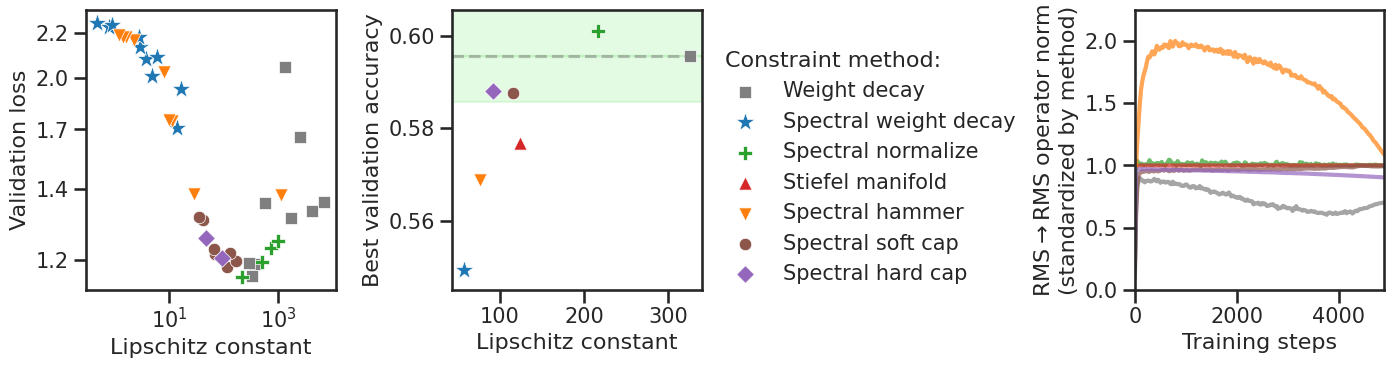

In [23]:
fig = plt.figure(figsize=(16, 3.5))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 0.8, 1, 0.1], wspace=0.6)

legend_handles = []
legend_labels = []
label_fontsize = 16
tick_fontsize = 15

# === LEFT PLOT ===
ax0 = fig.add_subplot(gs[0])
for technique in tech_map.keys():
    subset_df = highlight_points[highlight_points['technique'] == technique]
    if len(subset_df) == 0:
        continue

    lipschitz = list(subset_df['lipschitz'])
    val_loss = list(subset_df['final_val_loss'])
    color = tech_colors.get(tech_map.get(technique, "Unknown"), 'black')
    marker, size = markers.get(technique, ['o', 80])

    lipschitz_array = np.array(lipschitz)
    val_loss_array = np.array(val_loss)
    valid_indices = ~(np.isnan(lipschitz_array) | np.isnan(val_loss_array))

    sc = ax0.scatter(
        lipschitz_array[valid_indices], 
        val_loss_array[valid_indices], 
        color=color, 
        s=size, 
        marker=marker,
        edgecolors='white', 
        linewidth=0.5,
        label=tech_map.get(technique, technique)
    )
    # if tech_map.get(technique, technique) not in legend_labels:
    #     legend_handles.append(sc)
    #     legend_labels.append(tech_map.get(technique, technique))

ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.minorticks_off()
ax0.set_xlabel('Lipschitz constant', fontsize=label_fontsize)
ax0.set_ylabel('Validation loss', fontsize=label_fontsize)

class CustomLogFormatter(LogFormatter):
    def __call__(self, x, pos=None):
        # Format the tick label as a plain number
        if x < 1:
            return f"{x:.2f}"
        elif x < 10:
            return f"{x:.1f}"
        else:
            return f"{int(x)}"
    
    # Override these to prevent any offset text
    def get_offset(self):
        return ''
    
    def set_locs(self, locs=None):
        self.locs = locs
        return

# Apply the custom formatter to the y-axis
ax0.yaxis.set_major_formatter(CustomLogFormatter())

# Remove the minor tick labels which might still show scaling
ax0.yaxis.set_minor_formatter(NullFormatter())

# Force the ticks to good positions
y_min, y_max = 1.2, 2.2  # Adjust based on your data range
ax0.set_yticks(np.linspace(y_min, y_max, 5))

# === MIDDLE PLOT ===
ax1 = fig.add_subplot(gs[1])
ax1.axhspan(baseline_acc, upper_threshold, color='lightgreen', alpha=0.25)
ax1.axhspan(lower_threshold, baseline_acc, color='lightgreen', alpha=0.25)
ax1.axhline(y=baseline_acc, color='#7f7f7f', linestyle='--', alpha=0.5)
for technique in tech_map.keys():
    subset_df = results_df[results_df['technique'] == technique]
    if len(subset_df) == 0:
        continue
    subset = subset_df.iloc[0]
    lipschitz = subset['lipschitz']
    val_acc = subset['val_acc'][-1]
    color = tech_colors.get(tech_map.get(technique, "Unknown"), 'black')
    marker, size = markers.get(technique, ['o', 80])
    sc = ax1.scatter(lipschitz, val_acc, color=color, s=size, marker=marker, 
               edgecolors='white', linewidth=0.5,
               label=tech_map.get(technique, technique))
    if tech_map.get(technique, technique) not in legend_labels:
        legend_handles.append(sc)
        legend_labels.append(tech_map.get(technique, technique))

ax1.set_ylim(0.545, upper_threshold)
ax1.set_xlabel('Lipschitz constant', fontsize=label_fontsize)
ax1.set_ylabel('Best validation accuracy', fontsize=label_fontsize)

# === RIGHT PLOT ===
ax2 = fig.add_subplot(gs[3])
for technique in tech_map.keys():
    if technique in ['spec_wd']:
        continue
    subset_df = results_df[results_df['technique'] == technique]
    if len(subset_df) == 0:
        continue
    subset = subset_df.iloc[0]
    spectral_norms_0 = subset['spectral_norms_0']
    n_hidden = 256
    rms_norms_0 = [s for s in spectral_norms_0]
    if technique != 'none':
        rms_norms_0_stdrd = [s / subset['w_max'] for s in rms_norms_0]
    else:
        rms_norms_0_stdrd = [s * 0.1 for s in rms_norms_0]
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    tech_name = tech_map.get(technique, technique)
    ln, = ax2.plot(train_x_axis[:len(rms_norms_0)], rms_norms_0_stdrd, 
            color=color, linewidth=3, alpha=0.7, label=tech_name)
    if tech_name not in legend_labels:
        legend_handles.append(ln)
        legend_labels.append(tech_name)

ax2.set_ylim(0, 2.25)
ax2.set_xlim(-0.1, max(train_x_axis))
ax2.set_xlabel('Training steps', fontsize=label_fontsize)
ax2.set_ylabel('RMS$\\to$RMS operator norm\n(standardized by method)', fontsize=label_fontsize)

# === SHARED LEGEND ===
fig.legend(
    legend_handles, legend_labels,
    loc='center',
    bbox_to_anchor=(0.56, 0.5),
    frameon=False,
    ncol=1,
    fontsize=tick_fontsize,
    title='Constraint method:',
    title_fontsize=label_fontsize,
    alignment='left'
)

# === TICK SETTINGS ===
for ax in [ax0, ax1, ax2]:
    ax.tick_params(labelsize=tick_fontsize)

plt.subplots_adjust(left=0.07, right=0.97, top=0.95, bottom=0.15)

plt.savefig("full_moun_comparision.pdf", format='pdf', bbox_inches='tight')
plt.show()

## Muon vs Adam Figure
____


In [24]:
light_blue, light_green = "#B35F2B", "#32A852"
root_path = '/net/vast-storage/scratch/vast/mcdermott/rphess/modula-v2/'
path = Path(root_path) / "experiment/results/"
sub_folders = ['hardcap_results', 'orthog_results', 'softcap_results', 'spec_normalize_results', 'spec_wd_results', 'specham_results', 'normal_wd_results', 'adam_results', 'shakespeare']

results_concatenated = []
# iterate over all subfolders and open all json files in them
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for json_file in sub_folder_path.glob('*.json'):
        if 'adam' in str(json_file):
            optim = 'adam'
        else:
            optim = 'muon'
        with open(json_file, 'r') as f:
            data = json.load(f)
            # add the data to the results list
            results = data['results']
            technique = data['parameters']['project']['default']
            lr = data['parameters']['lr']
            wmax = data['parameters']['w_max']
            final_train_loss = results['losses'][-1]
            final_val_loss = results['val_losses'][-1]
            final_train_acc = results['train_accuracies'][-1]
            final_val_acc = results['accuracies'][-1]
            spec_wd = data['parameters'].get('spectral_wd', 0)
            wd = data['parameters']['wd']
            lipschitz = results['lipschitz_constant']
            model = data['parameters'].get('model', 'mlp')
            row = {
                'technique': technique,
                'lr': lr,
                'w_max': wmax,
                'final_train_loss': final_train_loss,
                'final_val_loss': final_val_loss,
                'final_train_acc': final_train_acc,
                'final_val_acc': final_val_acc,
                'spectral_wd': spec_wd,
                'wd': wd,
                'lipschitz': lipschitz,
                'model': model,
                'optim': optim
            }
            results_concatenated.append(row)
# create a dataframe from the results
sweep_df = pd.DataFrame(results_concatenated)

In [25]:
sweep_df

,technique,lr,w_max,final_train_loss,final_val_loss,final_train_acc,final_val_acc,spectral_wd,wd,lipschitz,model,optim
0,hard_cap,0.01000,8.0,2.302585,2.302585,0.089844,0.103809,0.0,0.0,2.972022e-11,mlp,muon
1,hard_cap,0.01000,4.0,2.302585,2.302585,0.089844,0.103613,0.0,0.0,2.968919e-11,mlp,muon
2,hard_cap,0.01000,7.0,2.302585,2.302585,0.091797,0.104199,0.0,0.0,2.969915e-11,mlp,muon
3,hard_cap,0.01000,9.0,2.302585,2.302585,0.091797,0.104785,0.0,0.0,2.971121e-11,mlp,muon
4,hard_cap,0.01000,6.0,2.302585,2.302585,0.091797,0.103906,0.0,0.0,2.971038e-11,mlp,muon
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,spec_normalize,9.00628,1.0,1.675720,1.767175,0.503540,0.467480,0.0,0.0,8.921552e-01,gpt,muon
2285,spec_normalize,9.00628,3.0,1.107861,1.280784,0.657715,0.610315,0.0,0.0,2.271586e+06,gpt,muon
2286,spec_normalize,9.00628,1.2,1.452729,1.484556,0.565125,0.543393,0.0,0.0,1.989185e+00,gpt,muon
2287,spec_normalize,9.00628,2.6,1.137937,1.230184,0.645142,0.615472,0.0,0.0,9.582908e+04,gpt,muon


In [26]:
MLP_df = sweep_df[sweep_df['model'] == 'mlp']
transformer_df = sweep_df[sweep_df['model'] == 'gpt']

In [39]:
best_adam_wd = MLP_df[(MLP_df['optim'] == 'adam') & (MLP_df['technique'] == 'none')]
# sort by final_val_acc and print the first 5 rows
best_adam_wd = best_adam_wd.sort_values(by='final_val_acc', ascending=False).head(5)
best_adam_wd

,technique,lr,w_max,final_train_loss,final_val_loss,final_train_acc,final_val_acc,spectral_wd,wd,lipschitz,model,optim,log_lipschitz,log_bin
1002,none,0.001259,1.0,0.971082,1.324498,0.669922,0.544824,0.0,0.077426,850.829163,mlp,adam,2.929842,"(2.889, 2.989]"
1007,none,0.001259,1.0,1.078401,1.294160,0.619141,0.542480,0.0,1.000000,506.623718,mlp,adam,2.704686,"(2.688, 2.788]"
1006,none,0.001259,1.0,1.034161,1.312163,0.650391,0.541309,0.0,0.599484,601.512634,mlp,adam,2.779245,"(2.688, 2.788]"
998,none,0.001259,1.0,0.958280,1.339588,0.685547,0.540625,0.0,0.010000,922.963135,mlp,adam,2.965184,"(2.889, 2.989]"
1015,none,0.002512,1.0,0.975127,1.333272,0.658203,0.539258,0.0,0.359381,954.019043,mlp,adam,2.979557,"(2.889, 2.989]"


In [27]:
# get rid of rows where the lipschitz constant is less than 10**-2 and rows where the final validation loss is greater than 7
MLP_df = MLP_df[MLP_df['lipschitz'] > 10**-1]
MLP_df = MLP_df[MLP_df['lipschitz'] < 10**4]
MLP_df = MLP_df[MLP_df['final_val_loss'] < 2.4]

# Bin Lipschitz values logarithmically
log_lipschitz = np.log10(MLP_df['lipschitz'])
MLP_df['log_lipschitz'] = log_lipschitz

# Define fine-grained log bins (e.g. 40 bins between log10(0.1) and log10(1e5))
num_bins = 50
bins = np.linspace(log_lipschitz.min(), log_lipschitz.max(), num_bins)
MLP_df['log_bin'] = pd.cut(log_lipschitz, bins)

# Create empty DataFrame to store the selected points
MLP_highlight_points = pd.DataFrame()

# For each optimizer type, select the best points separately
for optimizer in ['adam', 'muon']:
    optimizer_df = MLP_df[MLP_df['optim'] == optimizer]
    
    # Group by bins and pick the lowest loss point per bin
    best_points = (
        optimizer_df
        .dropna(subset=['lipschitz', 'final_val_loss'])  # Remove invalid
        .sort_values('final_val_loss')
        .groupby('log_bin', group_keys=False)
        .head(1)  # change to 1 or 3 depending on how sparse you want
    )

    # Append to the highlight points DataFrame
    MLP_highlight_points = pd.concat([MLP_highlight_points, best_points])

/tmp/ipykernel_654886/1447996552.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('log_bin', group_keys=False)
/tmp/ipykernel_654886/1447996552.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('log_bin', group_keys=False)


In [34]:
# find the best validation loss for mlp with optimzer adam and wd 0.1
best_adam_wd = MLP_highlight_points[(MLP_highlight_points['optim'] == 'adam') & (MLP_highlight_points['technique'] == 'none')]
# sort by final_val_loss and get the first row
best_adam_wd = best_adam_wd.sort_values('final_val_loss').iloc[0]
best_adam_wd

technique                     none
lr                        0.001259
w_max                          1.0
final_train_loss          1.078401
final_val_loss             1.29416
final_train_acc           0.619141
final_val_acc              0.54248
spectral_wd                    0.0
wd                             1.0
lipschitz               506.623718
model                          mlp
optim                         adam
log_lipschitz             2.704686
log_bin             (2.688, 2.788]
Name: 1007, dtype: object

In [22]:
def load_model(model_path):
    with np.load(model_path, allow_pickle=True) as data:
        params = data['args'].item()
        results = data['results'].item()
    return params, results

sub_folders = ['adv_robustness_nets']
new_results = []
for sub_folder in sub_folders:
    sub_folder_path = path / sub_folder
    for npz_file in sub_folder_path.glob('*.npz'):
        if 'adam' in str(npz_file):
            optim = 'adam'
        else:
            optim = 'muon'
        params, results = load_model(npz_file)
        # add the data to the results list
        technique = params['project']['default']
        lr = params['lr']
        wmax = params['w_max']
        final_train_loss = results['losses'][-1]
        final_val_loss = results['val_losses'][-1]
        final_train_acc = results['train_accuracies'][-1]
        final_val_acc = results['accuracies'][-1]
        spec_wd = params.get('spectral_wd', 0)
        wd = params['wd']
        lipschitz = results['lipschitz_constant']
        model = params.get('model', 'mlp')
        row = {
            'technique': technique,
            'lr': lr,
            'w_max': wmax,
            'final_train_loss': final_train_loss,
            'final_val_loss': final_val_loss,
            'final_train_acc': final_train_acc,
            'final_val_acc': final_val_acc,
            'spectral_wd': spec_wd,
            'wd': wd,
            'lipschitz': lipschitz,
            'model': model,
            'optim': optim
        }
        new_results.append(row)

In [23]:
new_results

[{'technique': 'none',
  'lr': 0.008111308307896872,
  'w_max': 2,
  'final_train_loss': 1.3065174619356792,
  'final_val_loss': 1.421818447113037,
  'final_train_acc': 0.564453125,
  'final_val_acc': 0.4927734434604645,
  'spectral_wd': 0,
  'wd': 0.1,
  'lipschitz': 7618.84375,
  'model': 'mlp',
  'optim': 'adam'},
 {'technique': 'soft_cap',
  'lr': 0.23101297000831597,
  'w_max': 3,
  'final_train_loss': 1.4630188594261806,
  'final_val_loss': 1.5657442033290863,
  'final_train_acc': 0.5625,
  'final_val_acc': 0.504589855670929,
  'spectral_wd': 0,
  'wd': 0,
  'lipschitz': 15.239435195922852,
  'model': 'mlp',
  'optim': 'muon'}]

In [24]:
new_results_df = pd.DataFrame(new_results)

# find the log bin for each new result
new_results_df['log_lipschitz'] = np.log10(new_results_df['lipschitz'])
new_results_df['log_bin'] = pd.cut(new_results_df['log_lipschitz'], bins)

# concatenate the new results with the highlighted MLP points
MLP_highlight_points = pd.concat([MLP_highlight_points, new_results_df], ignore_index=True)


In [25]:
MLP_highlight_points

,technique,lr,w_max,final_train_loss,final_val_loss,final_train_acc,final_val_acc,spectral_wd,wd,lipschitz,model,optim,log_lipschitz,log_bin
0,spec_hammer,0.005012,5.0,0.951581,1.261905,0.687500,0.554883,0.000000,0.0,129.453430,mlp,adam,2.112114,"(2.086, 2.186]"
1,spec_hammer,0.005012,6.0,0.819605,1.263916,0.738281,0.567773,0.000000,0.0,222.535324,mlp,adam,2.347399,"(2.286, 2.387]"
2,spec_hammer,0.005012,7.0,0.737186,1.280942,0.765625,0.564453,0.000000,0.0,351.335815,mlp,adam,2.545722,"(2.487, 2.588]"
3,none,0.001259,1.0,1.078401,1.294160,0.619141,0.542480,0.000000,1.0,506.623718,mlp,adam,2.704686,"(2.688, 2.788]"
4,spec_hammer,0.002512,4.0,1.074876,1.302535,0.650391,0.550781,0.000000,0.0,66.438652,mlp,adam,1.822421,"(1.784, 1.885]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,spec_wd,1.584893,1.0,2.301138,2.302428,0.089844,0.100195,0.016681,0.0,3342.425293,mlp,muon,3.524062,"(3.491, 3.591]"
91,spec_wd,1.584893,1.0,2.301304,2.302875,0.089844,0.100098,0.010000,0.0,9837.359375,mlp,muon,3.992879,"(3.892, 3.993]"
92,spec_wd,6.309573,1.0,2.301140,2.303793,0.089844,0.099902,0.077426,0.0,2321.708984,mlp,muon,3.365808,"(3.29, 3.391]"
93,none,0.008111,2.0,1.306517,1.421818,0.564453,0.492773,0.000000,0.1,7618.843750,mlp,adam,3.881889,"(3.792, 3.892]"


In [26]:
# get rid of rows where the lipschitz constant is less than 10**-2 and rows where the final validation loss is greater than 7
transformer_df = transformer_df[transformer_df['lipschitz'] > 10**-1]
transformer_df = transformer_df[transformer_df['lipschitz'] < 10**16]
transformer_df = transformer_df[transformer_df['final_val_loss'] < 2.4]

# Bin Lipschitz values logarithmically
log_lipschitz = np.log10(transformer_df['lipschitz'])
transformer_df['log_lipschitz'] = log_lipschitz

# Define fine-grained log bins (e.g. 40 bins between log10(0.1) and log10(1e5))
num_bins = 50
bins = np.linspace(log_lipschitz.min(), log_lipschitz.max(), num_bins)
transformer_df['log_bin'] = pd.cut(log_lipschitz, bins)

# Create empty DataFrame to store the selected points
transformer_highlight_points = pd.DataFrame()

# For each optimizer type, select the best points separately
for optimizer in ['adam', 'muon']:
    optimizer_df = transformer_df[transformer_df['optim'] == optimizer]
    
    # Group by bins and pick the lowest loss point per bin
    best_points = (
        optimizer_df
        .dropna(subset=['lipschitz', 'final_val_loss'])  # Remove invalid
        .sort_values('final_val_loss')
        .groupby('log_bin', group_keys=False)
        .head(1)  # change to 1 or 3 depending on how sparse you want
    )

    # Append to the highlight points DataFrame
    transformer_highlight_points = pd.concat([transformer_highlight_points, best_points])

/tmp/ipykernel_2081105/73513909.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('log_bin', group_keys=False)
/tmp/ipykernel_2081105/73513909.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('log_bin', group_keys=False)


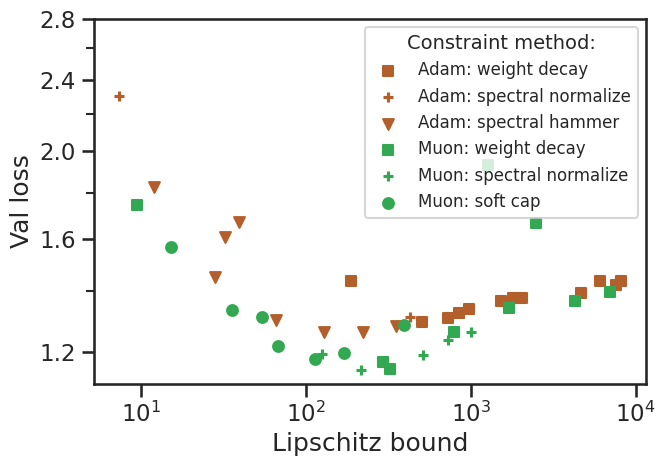

In [27]:
method_to_str = {
    ("adam", "none"): "Adam: weight decay",
    ("adam", "spec_normalize"): "Adam: spectral normalize",
    ("adam", "spec_hammer"): "Adam: spectral hammer",
    ("muon", "none"): "Muon: weight decay",
    ("muon", "spec_normalize"): "Muon: spectral normalize",
    ("muon", "soft_cap"): "Muon: soft cap",
}

plt.figure(figsize=(7, 5))

# List of combinations to plot
combinations = [
    ("adam", "none"),
    ("adam", "spec_normalize"),
    ("adam", "spec_hammer"),
    ("muon", "none"),
    ("muon", "spec_normalize"),
    ("muon", "soft_cap")
]

for opt, project in combinations:
    # Filter DataFrame for this optimizer and method combination
    subset_df = MLP_highlight_points[(MLP_highlight_points['optim'] == opt) & (MLP_highlight_points['technique'] == project)]
    
    if len(subset_df) == 0:
        continue
    
    # Extract x and y values from the DataFrame
    x = subset_df['lipschitz'].values
    y = subset_df['final_val_loss'].values
    
    # Define colors based on optimizer
    light_blue, light_green = "#B35F2B", "#32A852"
    color = light_green if opt == "muon" else light_blue
    
    # Set markers based on project type
    if project == "soft_cap":
        marker = 'o'
        markersize = 12
    elif project == "none":
        marker = 's'  # square for weight decay
        markersize = 12
    elif project == "spec_normalize":
        marker = '+'  # plus for spectral normalize
        markersize = 16
    elif project == "spec_hammer":
        marker = 'v'  # triangle down for spectral hammer
        markersize = 16
    
    # Plot the points
    plt.scatter(x, y, label=f"{method_to_str[(opt, project)]}", 
               color=color, alpha=1, marker=marker, s=60)

plt.xlabel("Lipschitz bound")
plt.ylabel("Val loss")
plt.xscale("log")
plt.yscale("log")

from matplotlib.ticker import LogFormatter, NullFormatter
class CustomLogFormatter(LogFormatter):
    def __call__(self, x, pos=None):
        # Format the tick label as a plain number
        if x < 1:
            return f"{x:.2f}"
        elif x < 10:
            return f"{x:.1f}"
        else:
            return f"{int(x)}"
    
    # Override these to prevent any offset text
    def get_offset(self):
        return ''
    
    def set_locs(self, locs=None):
        self.locs = locs
        return

ax = plt.gca()
# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(CustomLogFormatter())
# Remove the minor tick labels which might still show scaling
ax.yaxis.set_minor_formatter(NullFormatter())
# Force the ticks to good positions
y_min, y_max = 1.2, 2.8  # Adjust based on your data range
ax.set_yticks(np.linspace(y_min, y_max, 5))
ax.xaxis.set_tick_params(which='minor', bottom=False)

plt.legend(loc='upper right', fontsize=12, title='Constraint method:', title_fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.savefig("MLP_pareto_val_loss_vs_lipschitz.pdf", dpi=600, bbox_inches='tight')

/tmp/ipykernel_2081105/3557842736.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


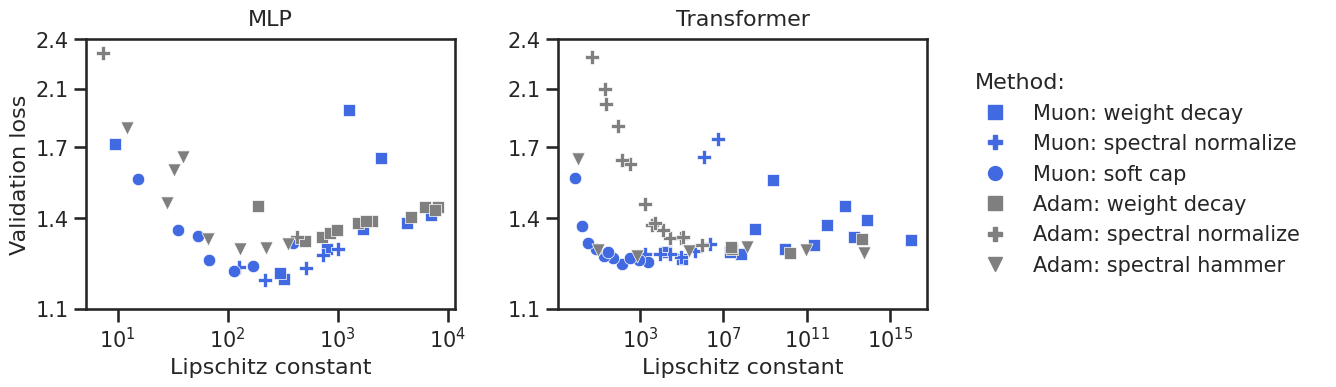

In [ ]:
method_to_str = {
    ("adam", "none"): "Adam: weight decay",
    ("adam", "spec_normalize"): "Adam: spectral normalize",
    ("adam", "spec_hammer"): "Adam: spectral hammer",
    ("muon", "none"): "Muon: weight decay",
    ("muon", "spec_normalize"): "Muon: spectral normalize",
    ("muon", "soft_cap"): "Muon: soft cap",
}

# Define font sizes
label_fontsize = 16
title_fontsize = 16
tick_fontsize = 15
legend_fontsize = 15

# Create figure and gridspec with 3 panels (left-middle-right)
fig = plt.figure(figsize=(16, 3.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.8], wspace=0.3)

# List of combinations to plot
combinations = [
    ("muon", "none"),
    ("muon", "spec_normalize"),
    ("muon", "soft_cap"),
    ("adam", "none"),
    ("adam", "spec_normalize"),
    ("adam", "spec_hammer"),
]

# Dictionary to store legend handles and labels
legend_elements = []

# Function to create plot with given data
def create_plot(ax, data_points, title, show_ylabel=True):
    for opt, project in combinations:
        # Filter DataFrame for this optimizer and method combination
        subset_df = data_points[(data_points['optim'] == opt) & (data_points['technique'] == project)]
        
        if len(subset_df) == 0:
            continue
        
        # Extract x and y values from the DataFrame
        x = subset_df['lipschitz'].values
        y = subset_df['final_val_loss'].values
        
        # Define colors based on optimizer
        light_blue, light_green = "#7f7f7f", "royalblue"
        color = light_green if opt == "muon" else light_blue
        
        # Set markers based on project type
        if project == "soft_cap":
            marker = 'o'
            markersize = 80
        elif project == "none":
            marker = 's'  # square for weight decay
            markersize = 80
        elif project == "spec_normalize":
            marker = 'P'  # plus for spectral normalize
            markersize = 90
        elif project == "spec_hammer":
            marker = 'v'  # triangle down for spectral hammer
            markersize = 90
        
        # Plot the points
        sc = ax.scatter(x, y, color=color, alpha=1, marker=marker, s=markersize, edgecolors='white', linewidth=0.5)
        
        # Store the legend element if it's not already in the list
        label = method_to_str[(opt, project)]
        if not any(label == elem.get_label() for elem in legend_elements):
            # Set appropriate marker sizes for the legend
            legend_elements.append(
                plt.Line2D([0], [0], marker=marker, color=color, linestyle='None', 
                          label=label, markersize=10)
            )

    ax.set_xlabel("Lipschitz constant", fontsize=label_fontsize)
    if show_ylabel:
        ax.set_ylabel("Validation loss", fontsize=label_fontsize)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(title, fontsize=title_fontsize, pad=10)
    
    # Set tick font sizes
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # Custom log formatter for y-axis
    class CustomLogFormatter(LogFormatter):
        def __call__(self, x, pos=None):
            # Format the tick label as a plain number
            if x < 1:
                return f"{x:.2f}"
            elif x < 10:
                return f"{x:.1f}"
            else:
                return f"{int(x)}"
        
        def get_offset(self):
            return ''
        
        def set_locs(self, locs=None):
            self.locs = locs
            return

    # Apply the custom formatter to the y-axis
    ax.yaxis.set_major_formatter(CustomLogFormatter())
    # Remove the minor tick labels which might still show scaling
    ax.yaxis.set_minor_formatter(NullFormatter())
    # Force the ticks to good positions
    y_min, y_max = 1.05, 2.4  # Adjust based on your data range
    ax.set_yticks(np.linspace(y_min, y_max, 5))
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.minorticks_off()
    ax.grid(False)

# Create the side panels
ax1 = fig.add_subplot(gs[0])
create_plot(ax1, MLP_highlight_points, "MLP")

ax3 = fig.add_subplot(gs[1])
create_plot(ax3, transformer_highlight_points, "Transformer", show_ylabel=False)

# Create the rightmost panel for legend
ax2 = fig.add_subplot(gs[2])
ax2.axis('off')  # Turn off axis for legend panel

# Add the combined legend to the middle panel
legend = ax2.legend(
    handles=legend_elements, 
    loc='center', 
    fontsize=legend_fontsize, 
    title='Method:', 
    title_fontsize=title_fontsize,
    frameon=False,
    alignment='left',
    bbox_to_anchor=(0.36, 0.5),
)

# Left align the legend title
legend.get_title().set_ha('left')

plt.tight_layout()
# plt.savefig("pareto_val_loss_vs_lipschitz_combined.pdf", dpi=600, bbox_inches='tight')

## Loading in the weights and plotting full spectra
____

In [ ]:
weight_paths = {
    "spec_wd":       "results/spec_wd_cifar_muon_val_loss_1.558_acc_0.549_lipschitz_56.927.npz",
    "spec_hammer":    "results/spec_hammer_cifar_muon_val_loss_1.262_acc_0.569_lipschitz_76.140.npz",
    "spec_normalize":       "results/spec_normalize_cifar_muon_val_loss_1.147_acc_0.601_lipschitz_216.568.npz",
    "orthogonal":   "results/orthogonal_cifar_muon_val_loss_1.217_acc_0.577_lipschitz_124.439.npz",
    "hard_cap":           "results/hard_cap_cifar_muon_val_loss_1.199_acc_0.588_lipschitz_92.181.npz",
    "soft_cap":           "results/soft_cap_cifar_muon_val_loss_1.185_acc_0.588_lipschitz_115.336.npz",
    "none":           "results/none_cifar_muon_val_loss_1.150_acc_0.596_lipschitz_326.632.npz",
}

In [ ]:
# load in the weights for spec_wd to see what they look like
data = np.load(weight_paths['spec_wd'], allow_pickle=True)



In [ ]:
array_names = data.files

In [ ]:
array_names

In [ ]:
weights = data['weights_checkpoint_0'].item()

In [ ]:
weights.keys()

In [ ]:
layer_0_weights = np.array(weights[0])
layer_1_weights = np.array(weights[1])
layer_2_weights = np.array(weights[2])

In [ ]:
layer_0_decomp = np.linalg.svd(layer_0_weights, full_matrices=True)
layer_1_decomp = np.linalg.svd(layer_1_weights, full_matrices=True)
layer_2_decomp = np.linalg.svd(layer_2_weights, full_matrices=True)
layer_0_singular_values = layer_0_decomp[1]
layer_1_singular_values = layer_1_decomp[1]
layer_2_singular_values = layer_2_decomp[1]

In [ ]:
# plot the spectral decomposition of the weights
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].plot(layer_0_singular_values, '-')
axs[0].set_title('Layer 0 Singular Values')
axs[0].set_xlabel('Singular Value Index')
axs[0].set_ylabel('Singular Value')
axs[1].plot(layer_1_singular_values, '-')
axs[1].set_title('Layer 1 Singular Values')
axs[1].set_xlabel('Singular Value Index')
axs[2].plot(layer_2_singular_values, '-')
axs[2].set_title('Layer 2 Singular Values')
axs[2].set_xlabel('Singular Value Index')
plt.tight_layout()
plt.show()

In [ ]:
# create a function to plot the spectral decomposition of the weights for each technique, using that techiniques specified colors.
# Each technique can have it's own separate plot.

def plot_spectral_decomposition(technique, weights_path):
    """
    Plot the spectral decomposition of the weights for a given technique.
    
    Parameters:
    - technique: The name of the technique (e.g., "spec_wd", "spec_hammer").
    - weights_path: The path to the weights file.
    """
    # Load the weights
    data = np.load(weights_path, allow_pickle=True)
    
    # Extract the weights
    weights = data['weights_checkpoint_0'].item()
    
    # Get the layer weights
    layer_0_weights = np.array(weights[0])
    layer_1_weights = np.array(weights[1])
    layer_2_weights = np.array(weights[2])
    
    # Get layer shapes for labels
    layer_0_shape = layer_0_weights.shape
    layer_1_shape = layer_1_weights.shape
    layer_2_shape = layer_2_weights.shape
    
    # Perform SVD
    layer_0_decomp = np.linalg.svd(layer_0_weights, full_matrices=True)
    layer_1_decomp = np.linalg.svd(layer_1_weights, full_matrices=True)
    layer_2_decomp = np.linalg.svd(layer_2_weights, full_matrices=True)
    
    # Get singular values
    layer_0_singular_values = layer_0_decomp[1]
    layer_1_singular_values = layer_1_decomp[1]
    layer_2_singular_values = layer_2_decomp[1]
    
    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    
    color = tech_colors.get(tech_map.get(technique, "Unknown"))
    
    # Plot singular values for each layer
    axs[0].plot(layer_0_singular_values, '-', color=color)
    axs[0].set_title(f'Layer 0 ({layer_0_shape[0]}×{layer_0_shape[1]})')
    axs[0].set_xlabel('Singular Value Index')
    axs[0].set_ylabel('Singular Value')
    
    axs[1].plot(layer_1_singular_values, '-', color=color)
    axs[1].set_title(f'Layer 1 ({layer_1_shape[0]}×{layer_1_shape[1]})')
    axs[1].set_xlabel('Singular Value Index')
    
    axs[2].plot(layer_2_singular_values, '-', color=color)
    axs[2].set_title(f'Layer 2 ({layer_2_shape[0]}×{layer_2_shape[1]})')
    axs[2].set_xlabel('Singular Value Index')
    
    # Set y limits to be the same for all plots
    plt.ylim(0, 15)
    
    # Add a super title for the technique
    fig.suptitle(f'{tech_map.get(technique, technique)} Singular Value Decomposition', 
                fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for the super title
    plt.show()

# Plot for each technique
for technique, path in weight_paths.items():
    plot_spectral_decomposition(technique, path)


In [ ]:
# for each technique, estimate the rank by counting the number of singular values above a certain threshold
def estimate_rank(singular_values, threshold=0.01):
    """
    Estimate the rank of a matrix based on its singular values.
    
    Parameters:
    - singular_values: Array of singular values.
    - threshold: Threshold to determine rank.
    
    Returns:
    - Estimated rank.
    """
    return np.sum(singular_values > threshold)

for technique, path in weight_paths.items():
    # Load the weights
    data = np.load(path, allow_pickle=True)
    
    # Extract the weights
    weights = data['weights_checkpoint_0'].item()
    
    # Get the layer weights
    layer_0_weights = np.array(weights[0])
    layer_1_weights = np.array(weights[1])
    layer_2_weights = np.array(weights[2])
    
    # Perform SVD
    layer_0_decomp = np.linalg.svd(layer_0_weights, full_matrices=True)
    layer_1_decomp = np.linalg.svd(layer_1_weights, full_matrices=True)
    layer_2_decomp = np.linalg.svd(layer_2_weights, full_matrices=True)
    
    # Get singular values
    layer_0_singular_values = layer_0_decomp[1]
    layer_1_singular_values = layer_1_decomp[1]
    layer_2_singular_values = layer_2_decomp[1]
    
    # Estimate rank for each layer
    rank_layer_0 = estimate_rank(layer_0_singular_values)
    rank_layer_1 = estimate_rank(layer_1_singular_values)
    rank_layer_2 = estimate_rank(layer_2_singular_values)
    
    print(f"{tech_map.get(technique, technique)}: Rank Layer 0: {rank_layer_0}, Rank Layer 1: {rank_layer_1}, Rank Layer 2: {rank_layer_2}")

In [ ]:
# print the lipschitz constant for each technique
for technique in tech_map.keys():
    subset_df = results_df[results_df['technique'] == technique]
    
    if len(subset_df) == 0:
        continue
        
    subset = subset_df.iloc[0]
    
    # Get the lipschitz constant
    lipschitz_constant = subset['lipschitz']
    
    print(f"{tech_map.get(technique, technique)}: {lipschitz_constant:.3f}")

## Test our power iteration

In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
def _power_iterate(M, key, steps=1000, eps=0):
    """Power iterate to find the principal singular value and vectors of M."""
    transpose = M.shape[0] > M.shape[1]
    if transpose:
        M = M.T
    A = M.T @ M

    # we use fold_in get different random numbers for different matrices
    # while avoiding the hassle of returning the subkey from splitting
    subkey = jax.random.fold_in(key, jnp.sum(M))
    v0 = jax.random.normal(subkey, shape=(M.shape[1],))
    v0 /= jnp.linalg.norm(v0)

    def cond_fun(state):
        v, old_v, i = state
        delta = jnp.max(jnp.abs(v - old_v))
        return jnp.logical_and(delta > eps, i < steps)

    def body_fun(state):
        v, _, i = state
        v_new = jnp.dot(A, v)
        v_new_norm = jnp.linalg.norm(v_new)
        v_new /= v_new_norm
        return (v_new, v, i + 1)

    v, _, _ = jax.lax.while_loop(cond_fun, body_fun, (v0, v0, 0))
    v_new = A @ v
    sigma_max = jnp.linalg.norm(v_new)
    if transpose:
        v = v.T
    u = M @ v / sigma_max
    return u, sigma_max, v

In [ ]:

def power_iteration(A, key, num_iters = 16):
    """
    Compute the top singular value and corresponding singular vectors of A via power iteration.

    Args:
        A: A 2D array of shape (m, n).
        key: A JAX PRNG key for initializing the random vector (to ensure different draws each call).
        num_iters: Number of power iterations to run.

    Returns:
        v: The top right singular vector (shape (n,)).
        sigma: The largest singular value.
        u: The top left singular vector (shape (m,)).
    """
    m, n = A.shape
    # Fold in dimensions to diversify the key per matrix shape
    init_key = jax.random.fold_in(key, m)
    init_key = jax.random.fold_in(init_key, n)

    if m < n:
        # iterate on AA^T to find u (shape m)
        u = jax.random.normal(init_key, (m,))
        u = u / jnp.linalg.norm(u)

        def body_u(u, _):
            w = A @ (A.T @ u)
            return w / jnp.linalg.norm(w), None

        u, _ = jax.lax.scan(body_u, u, None, length=num_iters)
        # compute sigma and v
        ATu = A.T @ u
        sigma = jnp.linalg.norm(ATu)
        v = ATu / sigma
    else:
        # iterate on A^T A to find v (shape n)
        v = jax.random.normal(init_key, (n,))
        v = v / jnp.linalg.norm(v)

        def body_v(v, _):
            w = A.T @ (A @ v)
            return w / jnp.linalg.norm(w), None

        v, _ = jax.lax.scan(body_v, v, None, length=num_iters)
        # compute sigma and u
        Av = A @ v
        sigma = jnp.linalg.norm(Av)
        u = Av / sigma

    return u, sigma, v

In [ ]:
# test the power iteration function on a matrix made by an outer product
key_1 = jax.random.PRNGKey(1)
key_2 = jax.random.PRNGKey(2)
key_3 = jax.random.PRNGKey(3)
key_4 = jax.random.PRNGKey(5)
u_1 = jax.random.normal(key_1, shape=(2,))
v_1 = jax.random.normal(key_2, shape=(2,))
u_2 = jax.random.normal(key_3, shape=(2,))
v_2 = jax.random.normal(key_4, shape=(2,))
u_1 /= jnp.linalg.norm(u_1)
v_1 /= jnp.linalg.norm(v_1)
u_2 /= jnp.linalg.norm(u_2)
v_2 /= jnp.linalg.norm(v_2)
print(f"u_1: {u_1}")
print(f"v_1: {v_1}")
print(f"u_2: {u_2}")
print(f"v_2: {v_2}")
M = jnp.outer(u_1, v_1) + jnp.outer(u_2, v_2)
M_0 = M.copy()
u, sigma, v = _power_iterate(M, key)
# v, sigma, u = power_iteration(M, key_1)
print(f"max singular value: {sigma}")

# get the true singular values
u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
print(f"true spectral norm values: {s[0]}")


In [ ]:
# make a random rectangular matrix
key = jax.random.PRNGKey(0)
M = jax.random.normal(key, shape=(3, 4))
M_0 = M.copy()
# u, sigma, v = _power_iterate(M, key)
u, sigma, v = power_iteration(M, key_1)
print(f"max singular value: {sigma}")

u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
print(f"true spectral norm values: {s[0]}")


In [ ]:
# compose the first rank approximation using u and v
M_approx = jnp.outer(u, v)

In [ ]:
errors = []
for i in range(100):
    # test the power iteration function on a matrix made by an outer product
    key_1 = jax.random.PRNGKey(i)
    key_2 = jax.random.PRNGKey(i + 1)
    key_3 = jax.random.PRNGKey(i + 2)
    key_4 = jax.random.PRNGKey(i + 3)
    u_1 = jax.random.normal(key_1, shape=(2,))
    v_1 = jax.random.normal(key_2, shape=(2,))
    u_2 = jax.random.normal(key_3, shape=(2,))
    v_2 = jax.random.normal(key_4, shape=(2,))
    u_1 /= jnp.linalg.norm(u_1)
    v_1 /= jnp.linalg.norm(v_1)
    u_2 /= jnp.linalg.norm(u_2)
    v_2 /= jnp.linalg.norm(v_2)
    M = jnp.outer(u_1, v_1) + jnp.outer(u_2, v_2)
    M_0 = M.copy()
    u, sigma, v = power_iteration(M, key_1)

    # get the true singular values
    u, s, v = jnp.linalg.svd(M_0, full_matrices = True)
    error = jnp.abs(sigma - s[0])
    error /= s[0]
    jnp.abs(error)
    errors.append(error)

print(f"mean error: {np.mean(errors)}")
# plot the errors
plt.plot(errors, '-')
plt.title('Power Iteration Error')
# plot a histogram of the errors
plt.hist(errors, bins=20)
plt.title('Power Iteration Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()